In [1]:
from integrate_it.integrate import *
from matplotlib import pyplot as plt
from matplotlib.patches import Polygon
import numpy as np

# Задание региона

Вводите точки в формате "x y" (минимум 3). Для окончания ввода введите пустую строку. В качестве альтернативы можно задать координатыы вершин в коде.

In [2]:
verts = [[-17, 10], [-17, 15], [13, 15], [13, 10]]
if len(verts) == 0:
    inp = ""
    while True:
        inp = input()
        try:
            verts.append(list(map(float, inp.split())))
            if len(verts[-1]) != 2:
                verts.pop(-1)
            else:
                continue
        except Exception:
            pass
        if inp == "" and len(verts) >=3:
                break
        print("Неверный формат ввода!")
verts = np.array(verts,dtype=float)

Установите значение флага <b>square</b> на True если область является прямоугольником со сторонами, параллельными осям координат. Это в разы ускорит процесс интегрирования (не потребуется переопределять функцию на сетке), а также повлияет на расчет погрешности (более точно).

In [ ]:
square = True

Визуализируем регион

/home/vladislav/Documents/StudyDocs/Math/Lab_multiple_itegrals/integrate_it/integrate.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


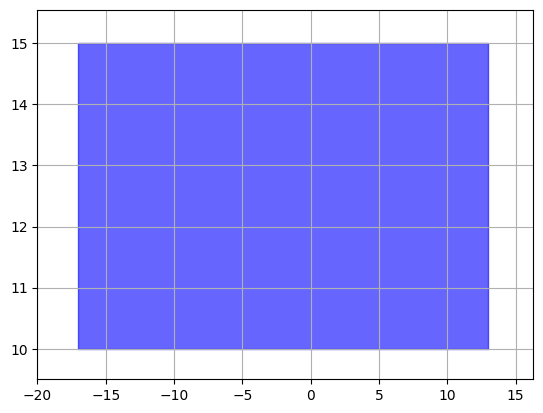

In [4]:
rg = Region(verts,is_square=square)
rg.visualize()

# Задание Функции

In [5]:
func = lambda x, y: x**2 / y # Функция
func_der_x = lambda x, y: 2*x/y # Частная производная по х
func_der_y = lambda x, y: -x**2 / (y**2) # Частная производная по у
func_der_xy = lambda x, y: -2*x / (y**2) # Частная производная второго порядка

# Интегрирование

## Демонстрация работы

Установим количество промежутков разбиения по осям. Примем $N_x = N_y = N$.

In [ ]:
N = 10000
N_x, N_y = [N]*2 

In [6]:
part = Partition(func,rg,"grid",N_x,N_y) # Создадим объект разбиения
info = { # Словарь с информацией, необходимой для оценки погрешностей
    "n_x":N_x,
    "n_y":N_y,
    "diff_x": rg.get_max_x() - rg.get_min_x(),
    "diff_y": rg.get_max_y() - rg.get_min_y(),
    "max_func": 17**2 / 10,
    "max_dfunc_dx": 2*17/10,
    "max_dfunc_dy": (17/10)**2,
    "max_dfunc_dx_dy": 2*17/100,
    "is_square": square
}
integ = Integrator_Riemann(func) # Объект интегратора

Получим результат интегрирования с оценкой ошибки

In [7]:
integ_output = integ.generate_riemann_sum(part,info)
integ_output

In [9]:
real_integ = 1/3 * np.log(1.5)*(13**3 + 17**3)

In [10]:
print(f"Результат численного интегрирования: {integ_output['riemann_sum']}\n" + 
      f"Реальное значение: {real_integ}\n" +
      f"Ошибка: {abs(real_integ - integ_output['riemann_sum'])}\n" +
      f"Теоретическая ошибка: {integ_output['error']}\n"+
      f"Мелкость разбиения: {integ_output['fineness']}")

Результат численного интегрирования: 961.0450599564429
Реальное значение: 960.9523062163495
Ошибка: 0.09275374009337156
Теоретическая ошибка: 0.873394125
Мелкость разбиения: 9.25e-06


## Исследование зависимости погрешности от мелкости разбиения